In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example running on test data. This part will not require integration.

For running the example you can find test data and pretrained model
here:

https://www.dropbox.com/sh/2yz76iidhwk9k1l/AAANFkXNIJW3o5QIwpQf8Azqa?dl=0

Please download the "test_data" and "models" directories. Where these are
stored is configured below.

In [26]:
data_dir = '/home/eriksen/data/bkgnet'

img_fname = 'red_paucam.13584.0959.0133.FT_NB615_NB685.2470402.std.02.fits'
img_path = os.path.join(data_dir, 'test_data', img_fname)



In [27]:
# This library contains functionality which is only needed for running
# tests on an image.
import libexample
from astropy.io import fits

# Band and exposure numbers
band = libexample.get_band(img_path)
exp_num = libexample.get_expnum(img_path)

# Image
hdul = fits.open(img_path)
img = hdul[0].data

# Pixel positions
cosmos_path = os.path.join(data_dir, 'test_data', 'cosmos.csv')
refcat = libexample.load_cosmos(cosmos_path)

header = fits.getheader(img_path)
header['CTYPE1'], header['CTYPE2'] = 'RA---TPV','DEC--TPV'

coords_pix = libexample.get_pixelpos(refcat, header)

# Background estimation

In [30]:
import bkgnet

# Use a different network before and after intervention.
interv = 'after' if 13 < exp_num else 'before'
model_path = os.path.join(data_dir, 'models', 'COSMOS_{}_v2.pt'.format(interv))

net = bkgnet.BKGnet(model_path)
X = net.background_img(img, coords_pix, band)

/home/eriksen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 10)

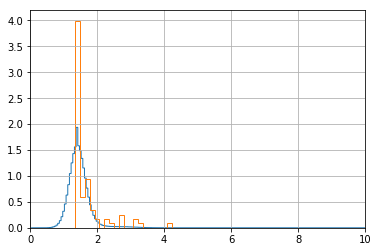

In [31]:
# This code is for making a quick test plot comparing
# the network prediction and individual pixel values in
# the image. These are *not* supposed to be the same, but
# to peak around the same value.
import pandas as pd
K = {'histtype': 'step', 'normed': True}
S = pd.Series(img.flatten()) #

S[S < 100].hist(bins=2000, **K)
X.hist(bins=20, **K)

from matplotlib import pyplot as plt
plt.xlim(0, 10)